In [4]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#import the data
df=pd.read_csv('Bostonfinal.csv')

In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.shape

(4988, 14)

In [8]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     4988 non-null   float64
 1   zn       4988 non-null   float64
 2   indus    4988 non-null   float64
 3   chas     4988 non-null   int64  
 4   nox      4988 non-null   float64
 5   rm       4932 non-null   float64
 6   age      4988 non-null   float64
 7   dis      4988 non-null   float64
 8   rad      4988 non-null   int64  
 9   tax      4988 non-null   int64  
 10  ptratio  4988 non-null   float64
 11  b        4988 non-null   float64
 12  lstat    4988 non-null   float64
 13  medv     4988 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 545.7 KB


In [10]:
#checking null values
df.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm          True
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool

we can see there are null values in rm column in our dataset

In [11]:
df.isnull().sum()

crim        0
zn          0
indus       0
chas        0
nox         0
rm         56
age         0
dis         0
rad         0
tax         0
ptratio     0
b           0
lstat       0
medv        0
dtype: int64

Replacing the null values with mean value

In [12]:

df['rm']=df['rm'].fillna(df['rm'].mean())


In [13]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

we can see that null values  are removed 

# Data Visualization

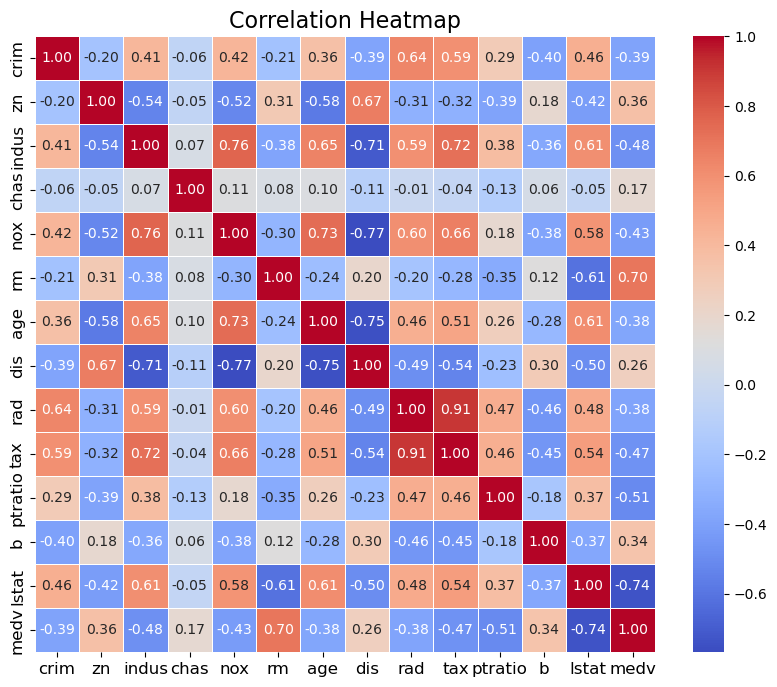

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Correlation Heatmap', fontsize=16)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

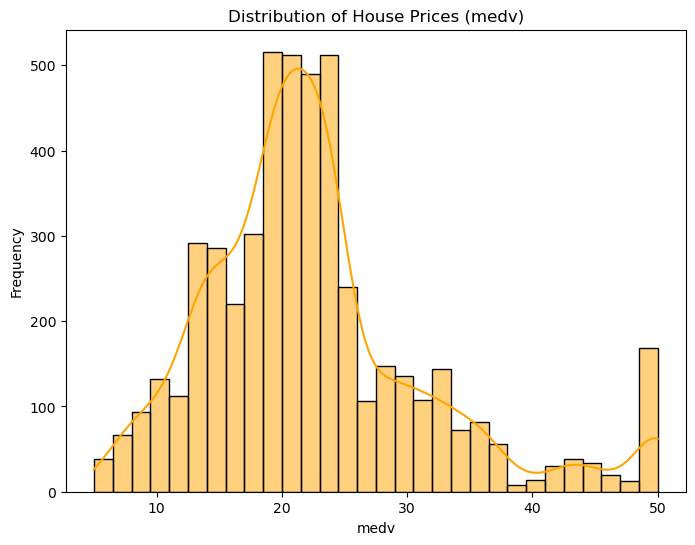

In [15]:
from scipy import stats

# Visualize distribution of target variable 'medv'
plt.figure(figsize=(8, 6))
sns.histplot(df['medv'], bins=30, kde=True, color='orange')
plt.title('Distribution of House Prices (medv)')
plt.xlabel('medv')
plt.ylabel('Frequency')
plt.show()

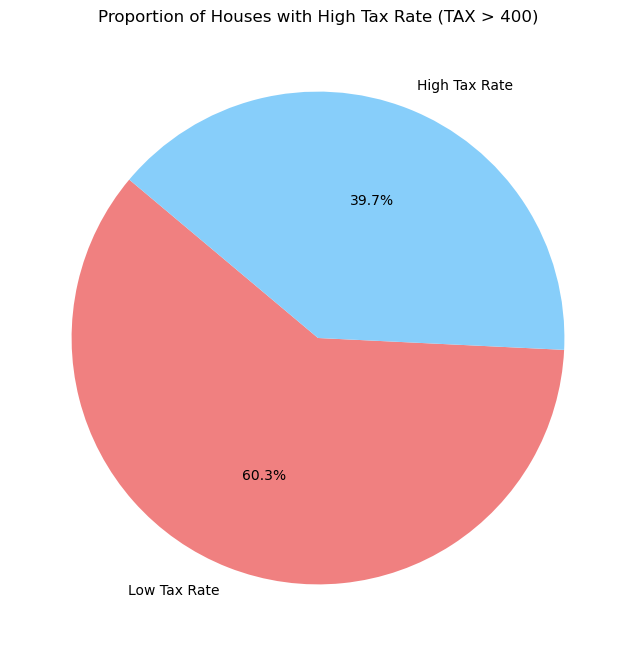

In [16]:
 #Pie Chart for Proportion of Houses with High Tax Rate (TAX > 400)
high_tax_count = len(df[df['tax'] > 400])
low_tax_count = len(df) - high_tax_count
tax_counts = [low_tax_count, high_tax_count]

labels = ['Low Tax Rate', 'High Tax Rate']
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(tax_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Houses with High Tax Rate (TAX > 400)')
plt.show()

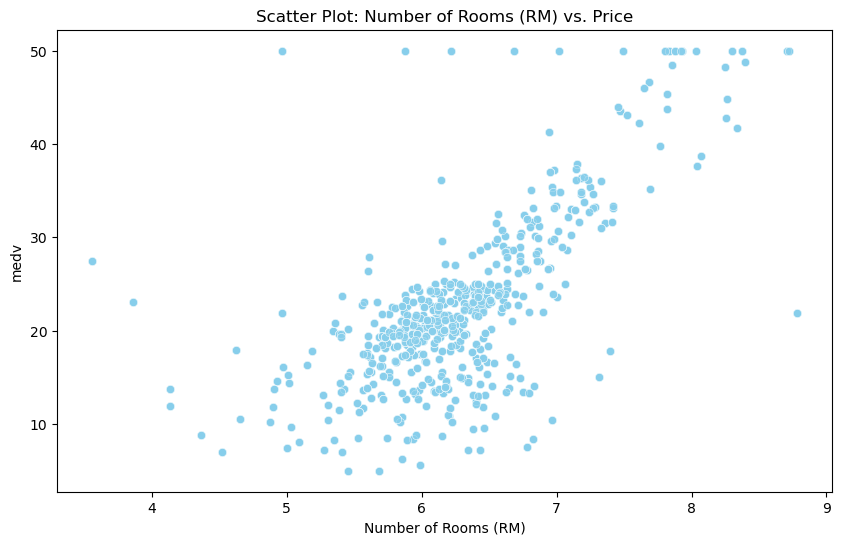

In [17]:
# Scatter Plot for Rooms vs. medv
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rm', y='medv', data=df, color='skyblue', alpha=0.7)
plt.title('Scatter Plot: Number of Rooms (RM) vs. Price')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('medv')
plt.show()


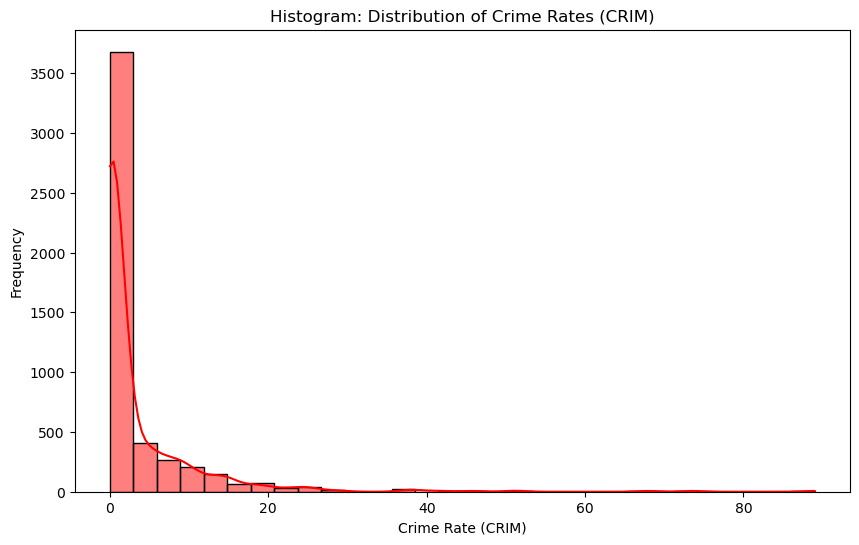

In [18]:
# Histogram for the Distribution of Crime Rates (CRIM)
plt.figure(figsize=(10, 6))
sns.histplot(df['crim'], bins=30, kde=True, color='red')
plt.title('Histogram: Distribution of Crime Rates (CRIM)')
plt.xlabel('Crime Rate (CRIM)')
plt.ylabel('Frequency')
plt.show()


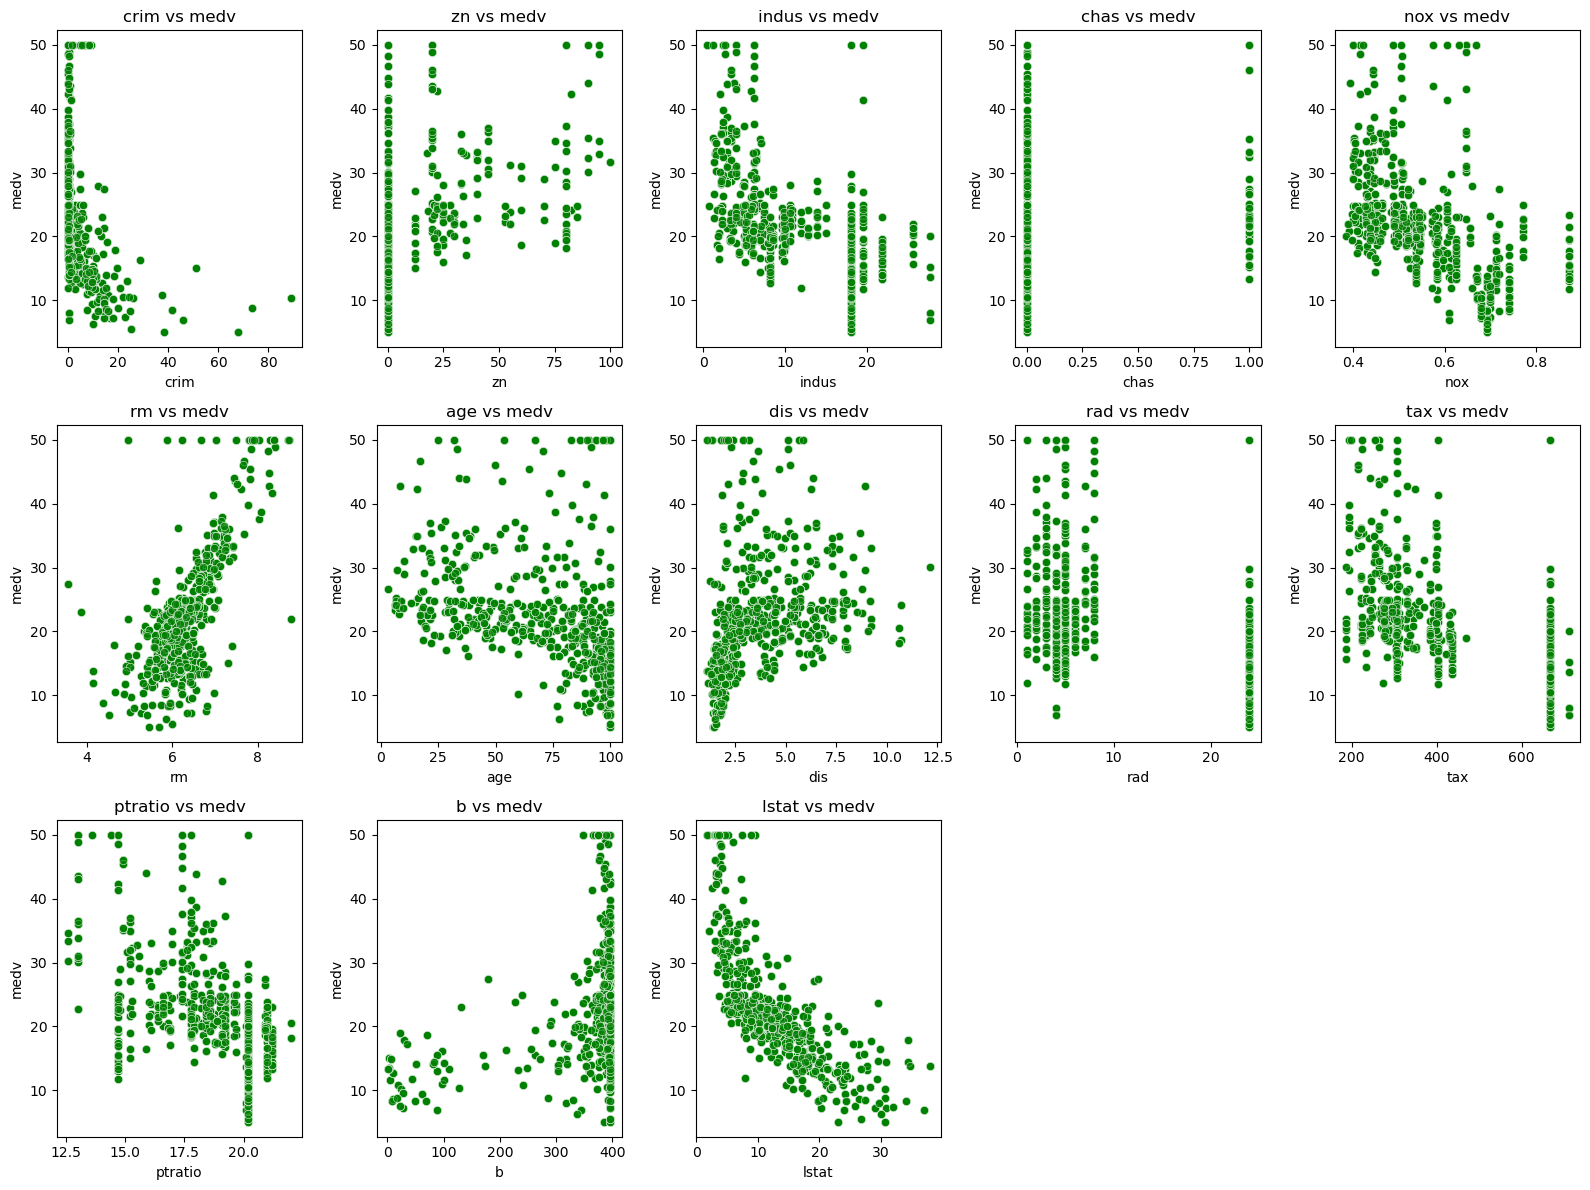

In [19]:
# Visualizing relationships between features and target variable using scatter plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 5, i+1)
    sns.scatterplot(x=df[col], y=df['medv'], color='green', alpha=0.7)
    plt.title(f'{col} vs medv')
plt.tight_layout()
plt.show()

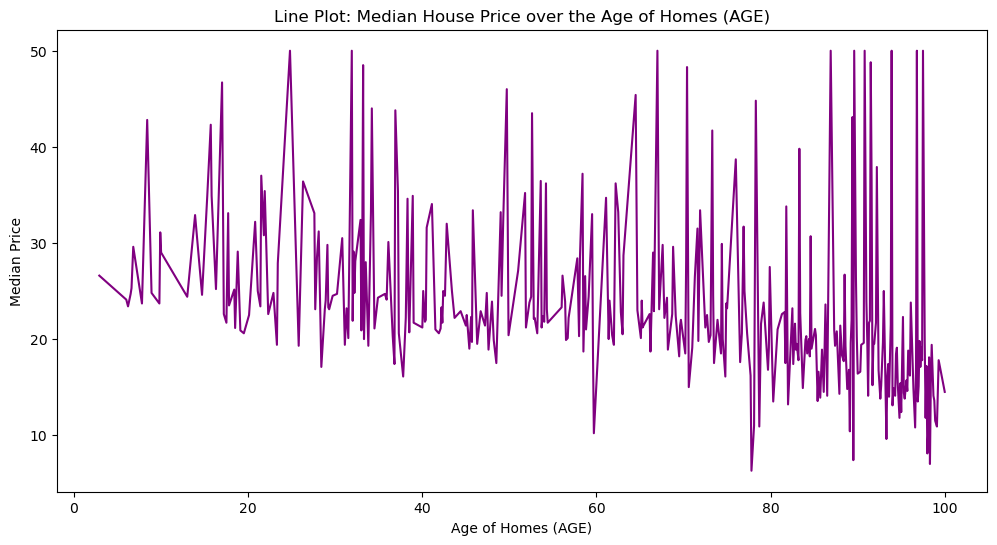

In [20]:
# Line Plot for Median House Price over the Age of Homes (AGE)
median_price_by_age = df.groupby('age')['medv'].median().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='medv', data=median_price_by_age, color='purple')
plt.title('Line Plot: Median House Price over the Age of Homes (AGE)')
plt.xlabel('Age of Homes (AGE)')
plt.ylabel('Median Price')
plt.show()


### Outlier Detection

<AxesSubplot:>

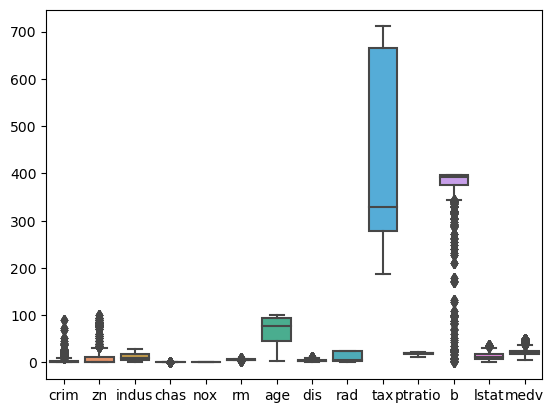

In [21]:
#box plot
sns.boxplot(data=df)

we can see outliers are present in crim,zn,rm,dis,ptratio,Lstat columns

# Removing outliers

removing outliers using z-score method

In [22]:
from scipy import stats

In [23]:
# Function to remove outliers using IQR
def remove_outliers_iqr(dataframe, column, lower_bound, upper_bound):
    Q1 = dataframe[column].quantile(lower_bound)
    Q3 = dataframe[column].quantile(upper_bound)
    IQR = Q3 - Q1
    return dataframe[(dataframe[column] >= Q1 - 3 * IQR) & (dataframe[column] <= Q3 + 3 * IQR)]

# Specify columns for which you want to remove outliers
columns_to_check = ['crim', 'zn', 'chas', 'rm', 'dis','ptratio', 'b', 'lstat', 'medv']

# Set the lower and upper bounds for outlier removal (adjust as needed)
lower_bound = 0.05
upper_bound = 0.95

# Remove outliers for each specified column
for column in columns_to_check:
    df = remove_outliers_iqr(df, column, lower_bound, upper_bound)

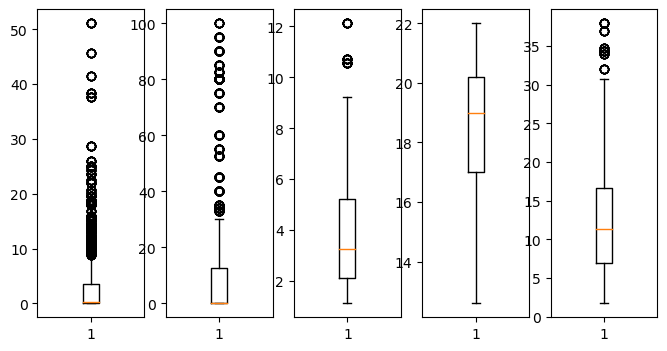

In [24]:
plt.figure(figsize=(8,4))
plt.subplot(151)
plt.boxplot(df['crim'])
plt.subplot(152)
plt.boxplot(df['zn'])
plt.subplot(153)
plt.boxplot(df['dis'])
plt.subplot(154)
plt.boxplot(df['ptratio'])
plt.subplot(155)
plt.boxplot(df['lstat'])
plt.show()

There are less outliers than before .It means they are removed.

In [25]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000
mean,3.148931,11.723811,11.094815,0.074134,0.554503,6.288515,68.462853,3.819251,9.448832,406.733280,18.429855,356.175121,12.564500,22.603465
std,6.381427,23.915497,6.862917,0.262015,0.116258,0.692523,28.022590,2.109579,8.657683,167.685629,2.174625,91.640626,7.092503,9.087148
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079780,0.000000,5.130000,0.000000,0.449000,5.888000,44.400000,2.106900,4.000000,279.000000,17.000000,375.210000,6.930000,17.100000
50%,0.252775,0.000000,9.690000,0.000000,0.538000,6.211000,77.300000,3.262800,5.000000,330.000000,19.000000,391.450000,11.320000,21.200000
75%,3.535010,12.500000,18.100000,0.000000,0.624000,6.619000,94.000000,5.214600,24.000000,666.000000,20.200000,396.230000,16.650000,25.000000
max,51.135800,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
df.shape

(4964, 14)

We can see shape and values in description of the data are changed .so outliers are removed


We can see every columns in our data are numeric. so we don't need to apply any encoding techniques

### Separating data into dependent and independent variables

In [27]:
x=df.drop('medv',axis=1)

In [28]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [29]:
y=df['medv']
y

0       24.0
1       21.6
2       34.7
3       33.4
4       36.2
        ... 
4983    14.5
4984    21.2
4985    23.1
4986    20.0
4987    25.0
Name: medv, Length: 4964, dtype: float64

# Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
columns = x.columns
x = pd.DataFrame(minmax.fit_transform(x), columns=columns)

In [31]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000411,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000410,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000509,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.001227,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [32]:
!pip install sweetviz

In [33]:
# Import SweetViz library
import sweetviz as sv

# Create and generate the report
sweet_report = sv.analyze(df)

# Save the report to an HTML file
sweet_report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Splitting data into train and test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3971, 13), (993, 13), (3971,), (993,))

# Model Building

# SVR

In [37]:
from sklearn.svm import SVR

svr_model = SVR(C=100, gamma='auto')
svr_model.fit(x_train, y_train)

SVR(C=100, gamma='auto')

In [38]:
svr_y_pred = svr_model.predict(x_test)
svr_y_pred

array([10.83271764, 21.74237415, 15.86609117, 17.08694448, 34.67861414,
       12.89921523, 20.55586298, 14.14362001, 38.08076234, 29.34116863,
       11.4292084 , 24.36241052, 24.44931881, 18.81636781, 26.81437715,
       20.32388505, 34.67861414, 16.60523026, 32.15710186, 25.45728658,
       25.75210828, 20.5011394 , 32.15710186, 11.3644923 , 25.86037349,
       28.2706846 , 12.71658329, 11.93894251, 19.50142593, 13.58699287,
       28.77094576, 11.3644923 , 26.0476209 , 18.80236036, 31.89220764,
       19.25167428, 20.32388505, 22.96338281, 15.0998841 , 19.30013805,
       19.85724319, 20.03775134,  8.19982187, 13.74281038, 19.27949237,
       19.52714842, 22.44062852, 15.69957598, 47.34179262, 18.81636781,
       12.63971858, 18.07632365, 32.15710186, 28.77094576, 15.36615701,
       30.29409943, 12.71658329, 13.83942055, 13.91089584, 22.90420148,
       17.38411673, 20.43361573, 11.10612266, 33.77557823, 21.13397081,
       28.20287439, 26.0476209 , 31.87055658, 15.09469603, 19.85

# Evaluating the model

In [39]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, mean_squared_error
mse_svr = mean_squared_error(y_test, svr_y_pred)
print('Mean squared error:', mse_svr)
r2_svr = r2_score(y_test, svr_y_pred)
print("R-squared (R2):", r2_svr)
mae_svr = mean_absolute_error(y_test, svr_y_pred)
print("Mean Absolute Error (MAE):", mae_svr)
rmse_svr= mean_squared_error(y_test, svr_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_svr)

Mean squared error: 10.206007549325781
R-squared (R2): 0.8861465551659975
Mean Absolute Error (MAE): 1.9659707232545014
Root Mean Squared Error (RMSE): 3.194684264418908


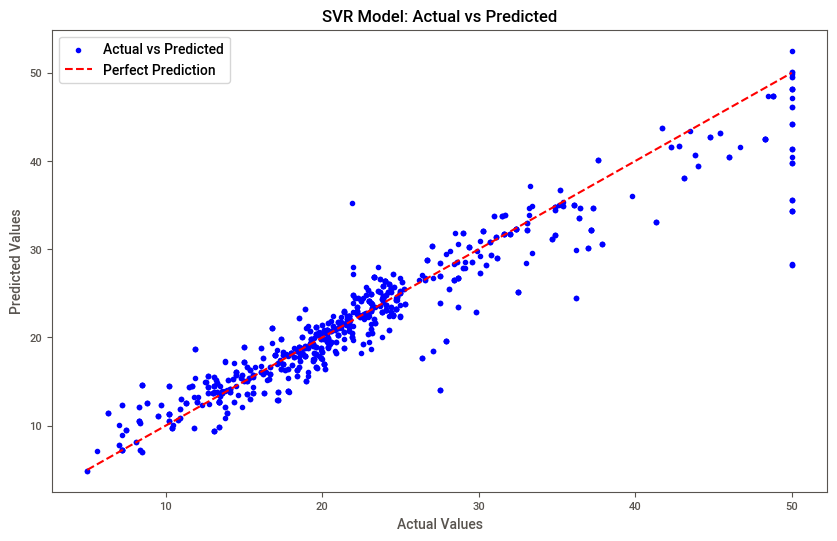

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR Model: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

We got 0.0039 as mse ,which indicates that the model is performing well.

# Linear regression

In [41]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [42]:
lr_y_pred=lr.predict(x_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_linear = mean_squared_error(y_test, lr_y_pred)
print('Mean squared error:', mse_linear)  # <-- Use mse_linear here
r2_linear = r2_score(y_test, lr_y_pred)
print("R-squared (R2):", r2_linear)
mae_linear = mean_absolute_error(y_test, lr_y_pred)
print("Mean Absolute Error (MAE):", mae_linear)
rmse_linear = mean_squared_error(y_test, lr_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_linear)


Mean squared error: 21.96971981129811
R-squared (R2): 0.7549160854070344
Mean Absolute Error (MAE): 3.3382245238695507
Root Mean Squared Error (RMSE): 4.6871867694063685


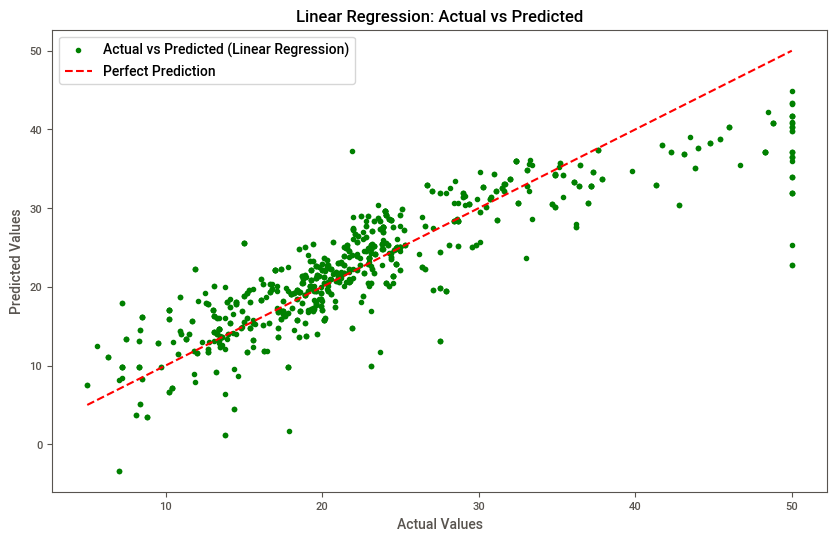

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_y_pred, color='green', label='Actual vs Predicted (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Descision Tree Regression

In [45]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [46]:
dt_y_pred=dt.predict(x_test)

In [47]:
mse_decision_tree = mean_squared_error(y_test, dt_y_pred)
print('Mean squared error:', mse_decision_tree)
r2_decision_tree = r2_score(y_test, dt_y_pred)
print("R-squared (R2):", r2_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, dt_y_pred)
print("Mean Absolute Error (MAE):", mae_decision_tree)
rmse_decision_tree= mean_squared_error(y_test, dt_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_decision_tree)

Mean squared error: 7.926741301405091e-30
R-squared (R2): 1.0
Mean Absolute Error (MAE): 1.790667871339024e-15
Root Mean Squared Error (RMSE): 2.8154469097116877e-15


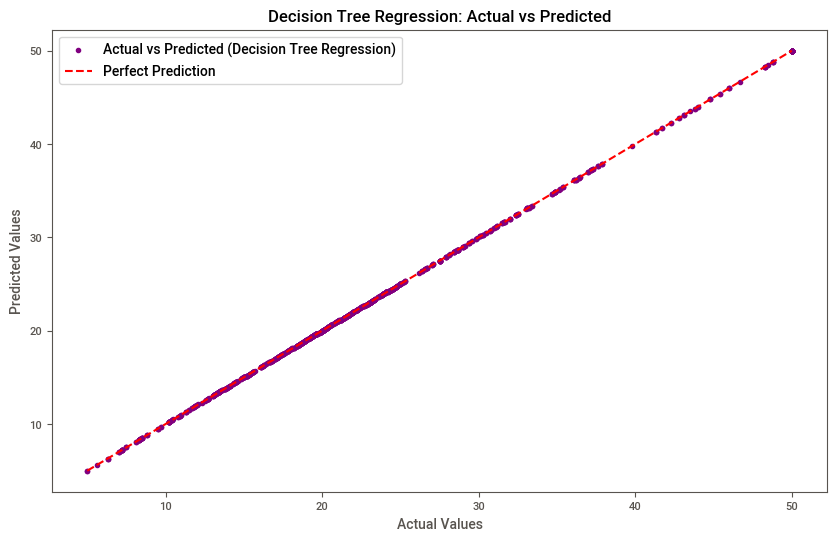

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred, color='purple', label='Actual vs Predicted (Decision Tree Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### KNN Regression

In [49]:
# Using K-Nearest Neighbors regression
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(x_train, y_train)

knn_y_pred = knn_model.predict(x_test)

In [50]:
# Evaluate the KNN model's performance
mse_knn = mean_squared_error(y_test, knn_y_pred)
print('Mean squared error:', mse_knn)
r2_knn = r2_score(y_test, knn_y_pred)
print("R-squared (R2):", r2_knn)
mae_knn = mean_absolute_error(y_test, knn_y_pred)
print("Mean Absolute Error (MAE):", mae_knn)
rmse_knn = mean_squared_error(y_test, knn_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_knn)

Mean squared error: 0.18118267875125899
R-squared (R2): 0.9979788108111437
Mean Absolute Error (MAE): 0.07609264853977843
Root Mean Squared Error (RMSE): 0.4256555870081573


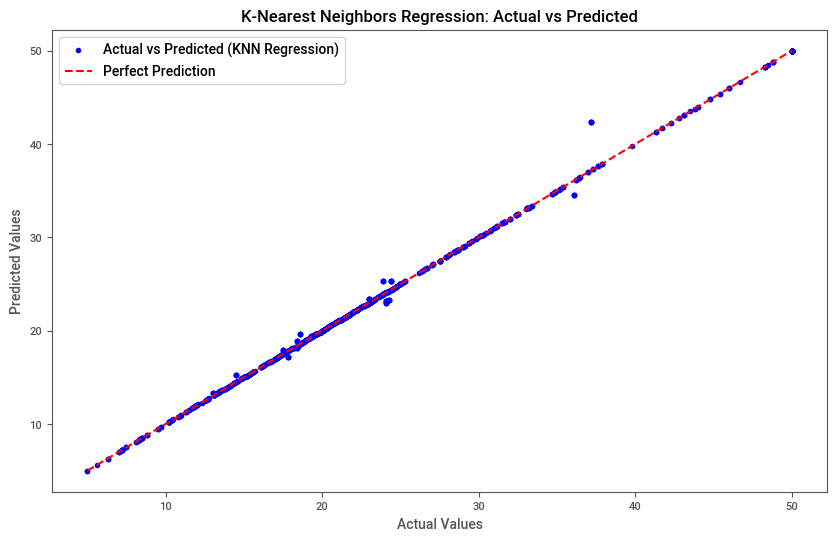

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_y_pred, color='blue', label='Actual vs Predicted (KNN Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('K-Nearest Neighbors Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Bayesian Linear Regression

In [52]:
from sklearn.linear_model import BayesianRidge

# Creating and fitting the Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()

bayesian_regressor.fit(x_train,y_train)

BayesianRidge()

In [53]:
# Make predictions on the test set
bayesian_y_pred = bayesian_regressor.predict(x_test)

In [54]:
# Compute the evaluation metrics
mse_bayesian= mean_squared_error(y_test, bayesian_y_pred)
print('Mean squared error:', mse_bayesian)
r2_bayesian = r2_score(y_test, bayesian_y_pred)
print("R-squared (R2):", r2_bayesian)
mae_bayesian = mean_absolute_error(y_test, bayesian_y_pred)
print("Mean Absolute Error (MAE):", mae_bayesian)
rmse_bayesian = mean_squared_error(y_test, bayesian_y_pred, squared=False)
print("Root Mean Squared Error (RMSE):",rmse_bayesian)

Mean squared error: 21.97784411944428
R-squared (R2): 0.7548254544267158
Mean Absolute Error (MAE): 3.337690736725286
Root Mean Squared Error (RMSE): 4.688053340080963


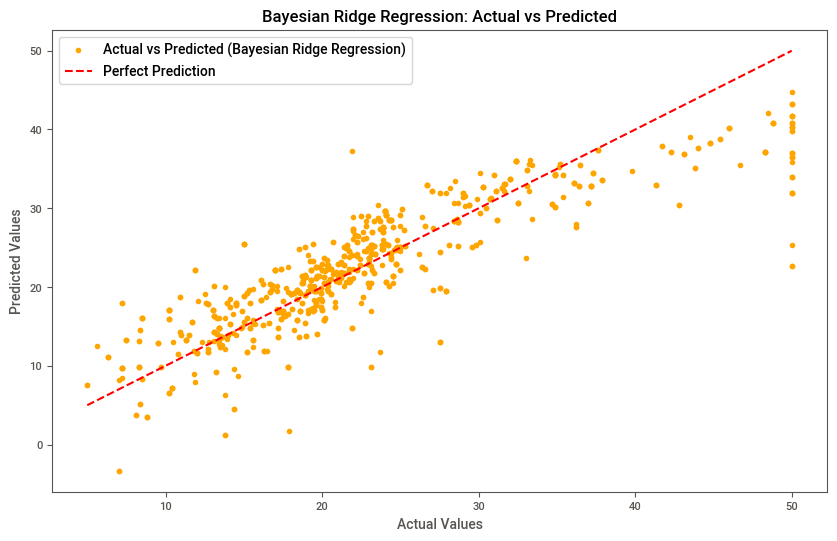

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, bayesian_y_pred, color='orange', label='Actual vs Predicted (Bayesian Ridge Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Bayesian Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Elastic Net Regression

In [56]:
from sklearn.linear_model import ElasticNet

alpha = 0.5  # Regularization parameter
l1_ratio = 0.5  # Mixing parameter, 0 for L2 penalty, 1 for L1 penalty
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net.fit(x_train, y_train)

ElasticNet(alpha=0.5)

In [57]:
y_pred_Elastic = elastic_net.predict(x_test)

In [58]:
# Compute the evaluation metrics
mse_elastic_net = mean_squared_error(y_test, y_pred_Elastic)
print('Mean squared error:', mse_elastic_net)
r2_elastic_net= r2_score(y_test, y_pred_Elastic)
print("R-squared (R2):", r2_elastic_net)
mae_elastic_net = mean_absolute_error(y_test, y_pred_Elastic)
print("Mean Absolute Error (MAE):", mae_elastic_net)
rmse_elastic_net = mean_squared_error(y_test, y_pred_Elastic, squared=False)
print("Root Mean Squared Error (RMSE):",rmse_elastic_net)

Mean squared error: 64.68855061122338
R-squared (R2): 0.278364797124509
Mean Absolute Error (MAE): 5.630318213614379
Root Mean Squared Error (RMSE): 8.042919284142007


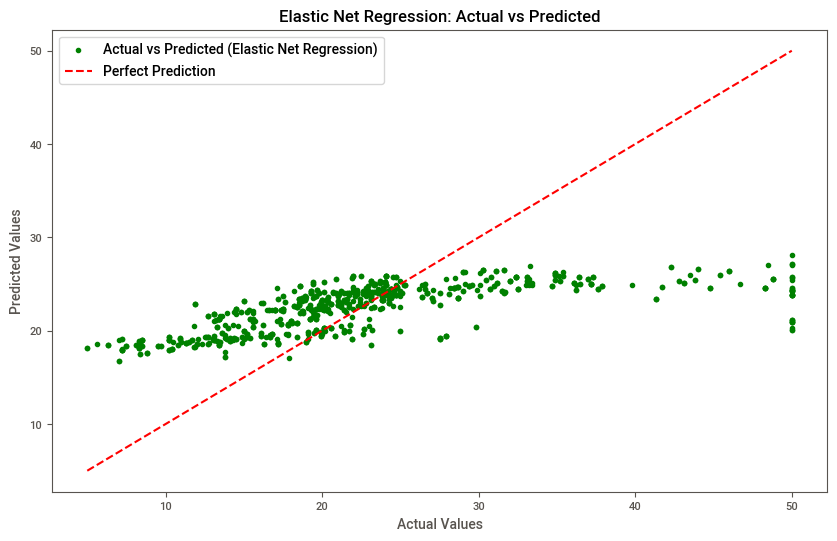

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_Elastic, color='green', label='Actual vs Predicted (Elastic Net Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Elastic Net Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Negative R2 value suggests that this model is not appropriate to use for this dataset

### Lasso L1 Regression

In [60]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)

lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [61]:
y_pred_l1 = lasso_reg.predict(x_test)

In [62]:
# Compute the evaluation metrics
mse_lasso = mean_squared_error(y_test, y_pred_l1)
print('Mean squared error:', mse_lasso)
r2_lasso = r2_score(y_test, y_pred_l1)
print("R-squared (R2):", r2_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_l1)
print("Mean Absolute Error (MAE):", mae_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_l1, squared=False)
print("Root Mean Squared Error (RMSE):",rmse_lasso)

Mean squared error: 89.66976508983525
R-squared (R2): -0.0003139429000280636
Mean Absolute Error (MAE): 6.8832180843846995
Root Mean Squared Error (RMSE): 9.469412077306345


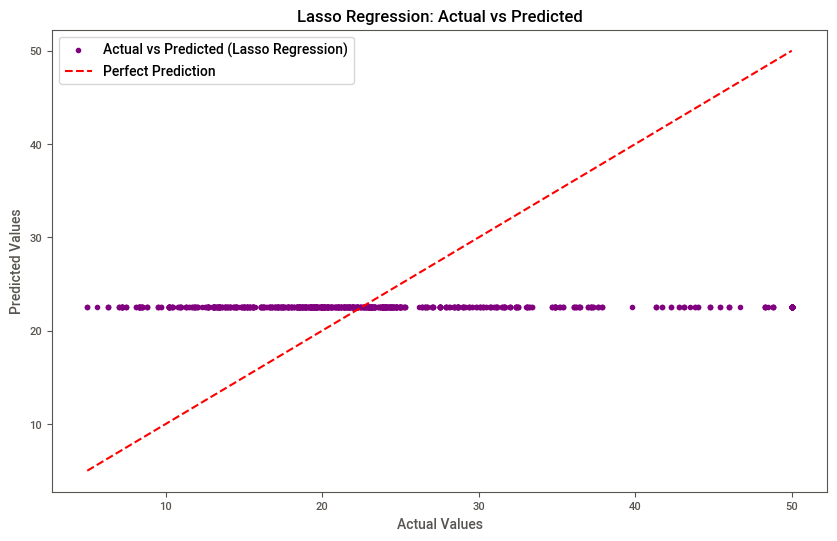

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_l1, color='purple', label='Actual vs Predicted (Lasso Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

considering the R2 value we assume this model is not suitable for this data

### L2 Ridge Regression

In [64]:
from sklearn.linear_model import Ridge

ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)

ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [65]:
y_pred_l2 = ridge_reg.predict(x_test)

In [66]:
# Compute the evaluation metrics
mse_ridge= mean_squared_error(y_test, y_pred_l2)
print('Mean squared error:', mse_ridge)
r2_ridge = r2_score(y_test, y_pred_l2)
print("R-squared (R2):", r2_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_l2)
print("Mean Absolute Error (MAE):", mae_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_l2, squared=False)
print("Root Mean Squared Error (RMSE):",rmse_ridge)

Mean squared error: 27.010322203000868
R-squared (R2): 0.6986854836207578
Mean Absolute Error (MAE): 3.60114170873416
Root Mean Squared Error (RMSE): 5.197145582240396


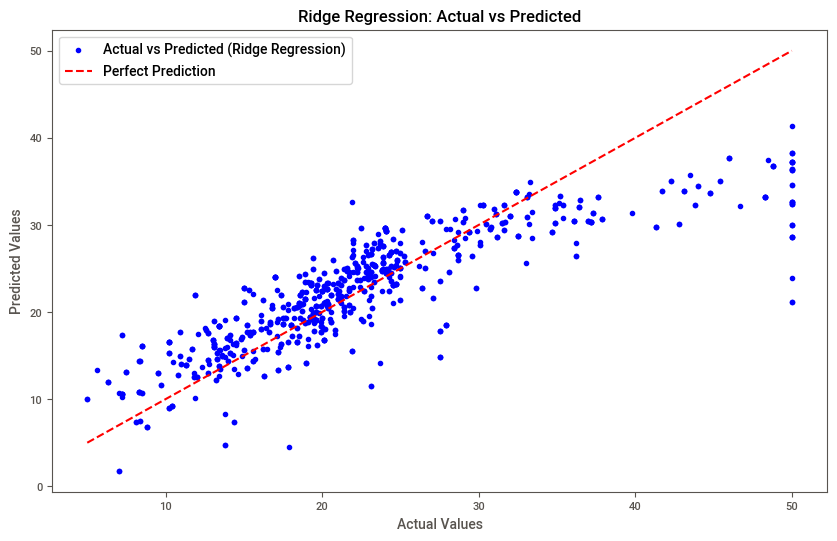

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_l2, color='blue', label='Actual vs Predicted (Ridge Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### GBM Gradient boosting machine

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_regressor.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [69]:
y_pred_gbm = gb_regressor.predict(x_test)

In [70]:
# Compute the evaluation metrics
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gbm)
print('Mean squared error:', mse_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gbm)
print("R-squared (R2):", r2_gradient_boosting)
mae_gradient_boosting = mean_absolute_error(y_test, y_pred_gbm)
print("Mean Absolute Error (MAE):", mae_gradient_boosting)
rmse_gradient_boosting = mean_squared_error(y_test, y_pred_gbm, squared=False)
print("Root Mean Squared Error (RMSE):",rmse_gradient_boosting)

Mean squared error: 2.1289085579744116
R-squared (R2): 0.9762508922425804
Mean Absolute Error (MAE): 1.1379875534057422
Root Mean Squared Error (RMSE): 1.4590779821429736


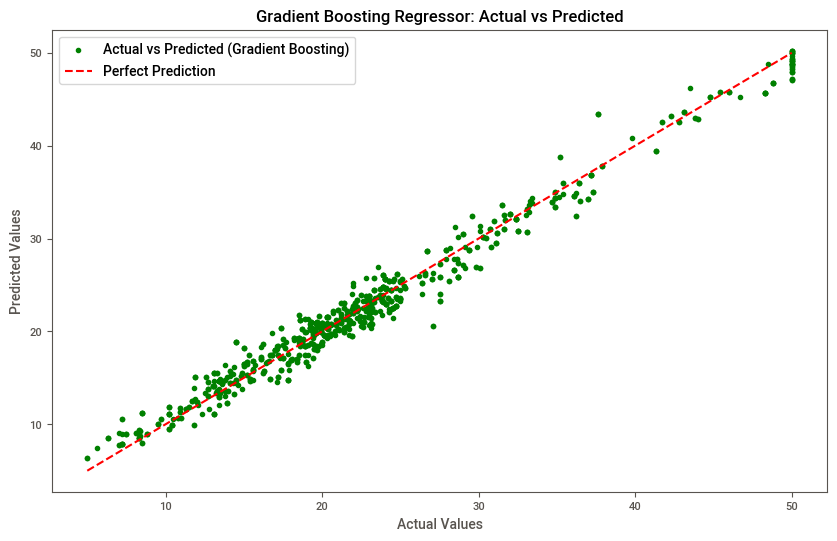

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='green', label='Actual vs Predicted (Gradient Boosting)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Gradient Boosting Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Random forest Regression

In [72]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [73]:
y_pred_randomforest = random_forest_regressor.predict(x_test)

In [74]:
# Compute the evaluation metrics
mse_random_forest = mean_squared_error(y_test, y_pred_randomforest)
print('Mean squared error:', mse_random_forest )
r2_random_forest = r2_score(y_test, y_pred_randomforest)
print("R-squared (R2):", r2_random_forest )
mae_random_forest = mean_absolute_error(y_test, y_pred_randomforest)
print("Mean Absolute Error (MAE):", mae_random_forest )
rmse_random_forest = mean_squared_error(y_test, y_pred_randomforest, squared=False)
print("Root Mean Squared Error (RMSE):",rmse_random_forest )

Mean squared error: 0.0010764612286000327
R-squared (R2): 0.9999879915022094
Mean Absolute Error (MAE): 0.008175226586121425
Root Mean Squared Error (RMSE): 0.03280946858149386


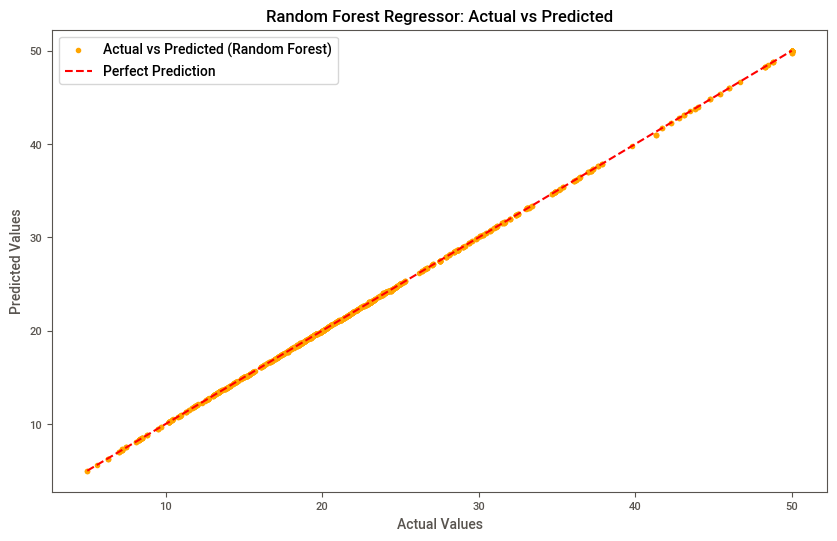

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_randomforest, color='orange', label='Actual vs Predicted (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Ada Boost Regression

In [76]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost_reg = AdaBoostRegressor(n_estimators=50, random_state=42)

ada_boost_reg.fit(x_train,y_train)

AdaBoostRegressor(random_state=42)

In [77]:
y_pred_adaboost = ada_boost_reg.predict(x_test)

In [78]:
# Compute the evaluation metrics
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
print('Mean squared error:', mse_adaboost)
r2_adaboost= r2_score(y_test, y_pred_adaboost)
print("R-squared (R2):", r2_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
print("Mean Absolute Error (MAE):", mae_adaboost)
rmse_adaboost = mean_squared_error(y_test, y_pred_adaboost, squared=False)
print("Root Mean Squared Error (RMSE):",rmse_adaboost)

Mean squared error: 8.236521316530135
R-squared (R2): 0.9081172220573559
Mean Absolute Error (MAE): 2.4145661392393065
Root Mean Squared Error (RMSE): 2.8699340265117828


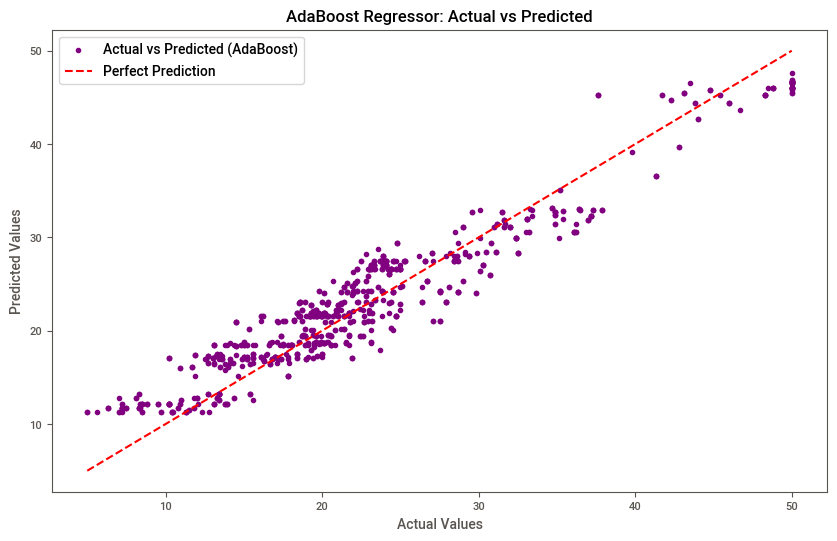

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='purple', label='Actual vs Predicted (AdaBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('AdaBoost Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Poisson regression

In [80]:
from sklearn.linear_model import PoissonRegressor

poisson_reg = PoissonRegressor()

poisson_reg.fit(x_train,y_train)

PoissonRegressor()

In [81]:
y_pred_poisson = poisson_reg.predict(x_test)

In [82]:
# Compute the evaluation metrics
mse_poisson = mean_squared_error(y_test, y_pred_poisson)
print('Mean squared error:', mse_poisson)
r2_poisson  = r2_score(y_test, y_pred_poisson)
print("R-squared (R2):", r2_poisson)
mae_poisson = mean_absolute_error(y_test, y_pred_poisson)
print("Mean Absolute Error (MAE):", mae_poisson)
rmse_poisson  = mean_squared_error(y_test, y_pred_poisson, squared=False)
print("Root Mean Squared Error (RMSE):",rmse_poisson)

Mean squared error: 35.854599063313856
R-squared (R2): 0.6000228692002139
Mean Absolute Error (MAE): 4.06681297113302
Root Mean Squared Error (RMSE): 5.987870995881078


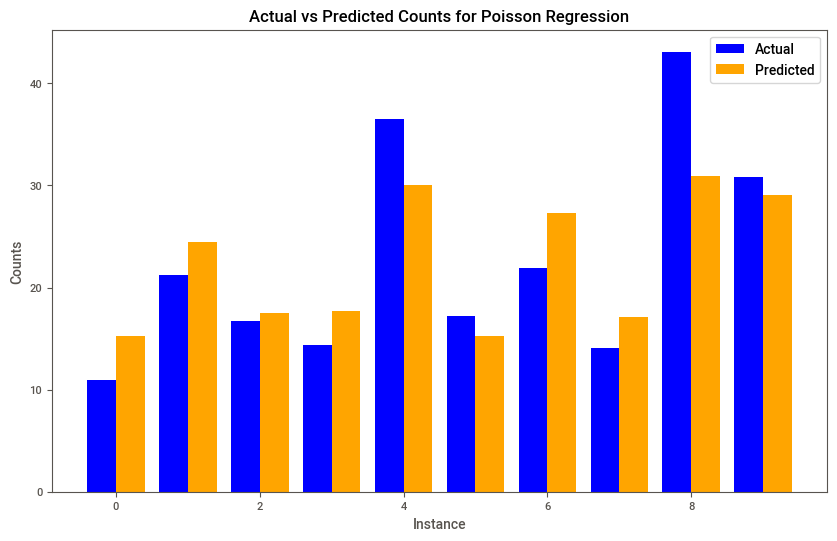

In [83]:
indices = np.arange(len(y_test[:10]))

# Plot actual and predicted counts
plt.figure(figsize=(10, 6))
plt.bar(indices - 0.2, y_test[:10], width=0.4, label='Actual', color='blue')
plt.bar(indices + 0.2, y_pred_poisson[:10], width=0.4, label='Predicted', color='orange')
plt.xlabel('Instance')
plt.ylabel('Counts')
plt.title('Actual vs Predicted Counts for Poisson Regression')
plt.legend()
plt.show()

In [84]:
models = {
    'Linear Regression': {'mse': mse_linear, 'r2': r2_linear, 'mae': mae_linear, 'rmse': rmse_linear},
    'Ridge Regression': {'mse': mse_ridge, 'r2': r2_ridge, 'mae': mae_ridge, 'rmse': rmse_ridge},
    'Lasso Regression': {'mse': mse_lasso, 'r2': r2_lasso, 'mae': mae_lasso, 'rmse': rmse_lasso},
    'Elastic Net Regression': {'mse': mse_elastic_net, 'r2': r2_elastic_net, 'mae': mae_elastic_net, 'rmse': rmse_elastic_net},
    'Support Vector Regression (SVR)': {'mse': mse_svr, 'r2': r2_svr, 'mae': mae_svr, 'rmse': rmse_svr},
    'Decision Tree Regression': {'mse': mse_decision_tree, 'r2': r2_decision_tree, 'mae': mae_decision_tree, 'rmse': rmse_decision_tree},
    'Random Forest Regression': {'mse': mse_random_forest, 'r2': r2_random_forest, 'mae': mae_random_forest, 'rmse': rmse_random_forest},
    'Gradient Boosting Regression': {'mse': mse_gradient_boosting, 'r2': r2_gradient_boosting, 'mae': mae_gradient_boosting, 'rmse': rmse_gradient_boosting},
    'AdaBoost Regression': {'mse': mse_adaboost, 'r2': r2_adaboost, 'mae': mae_adaboost, 'rmse': rmse_adaboost},
    'K-Nearest Neighbors (KNN) Regression': {'mse': mse_knn, 'r2': r2_knn, 'mae': mae_knn, 'rmse': rmse_knn},
    'Bayesian Linear Regression': {'mse': mse_bayesian, 'r2': r2_bayesian, 'mae': mae_bayesian, 'rmse': rmse_bayesian},
    'Poisson Regression': {'mse': mse_poisson, 'r2': r2_poisson, 'mae': mae_poisson, 'rmse': rmse_poisson},
}

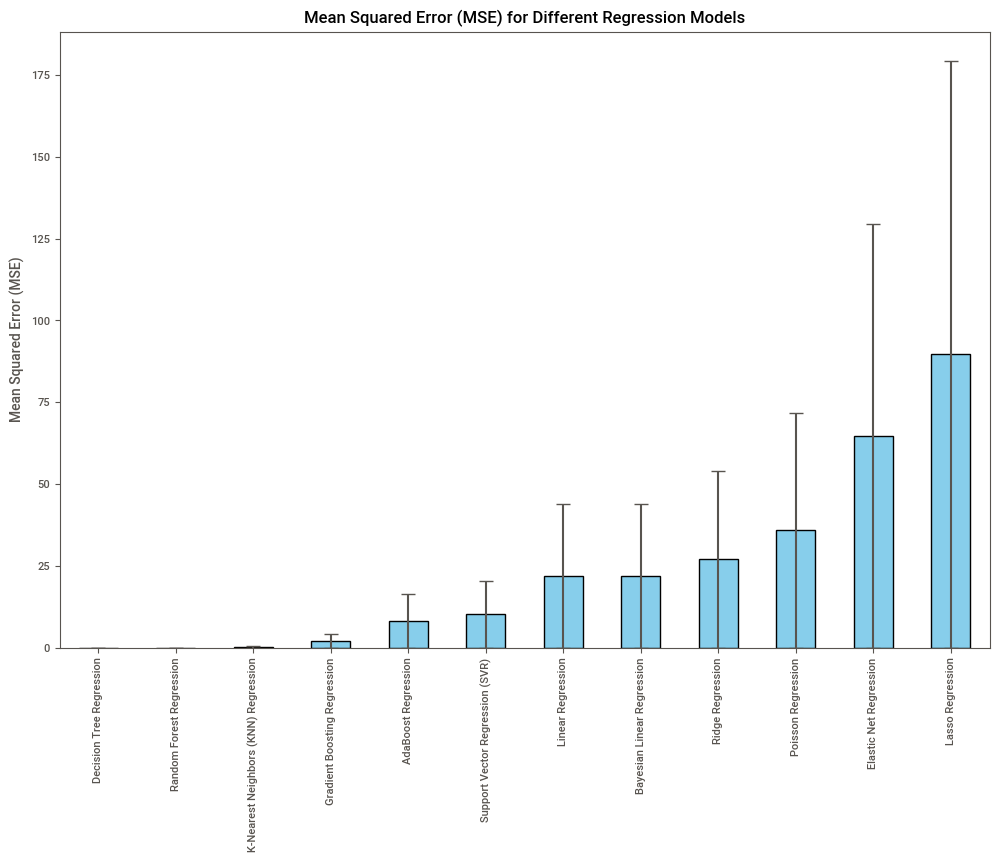

In [85]:
# Convert the 'models' dictionary to a DataFrame for easier plotting
df = pd.DataFrame.from_dict(models, orient='index')

fig, ax = plt.subplots(figsize=(12, 8))
df['mse'].sort_values().plot(kind='bar', color='skyblue', edgecolor='black', ax=ax, yerr=df['mse'], capsize=5)
ax.set_title('Mean Squared Error (MSE) for Different Regression Models')
ax.set_ylabel('Mean Squared Error (MSE)')

plt.show()

<AxesSubplot:>

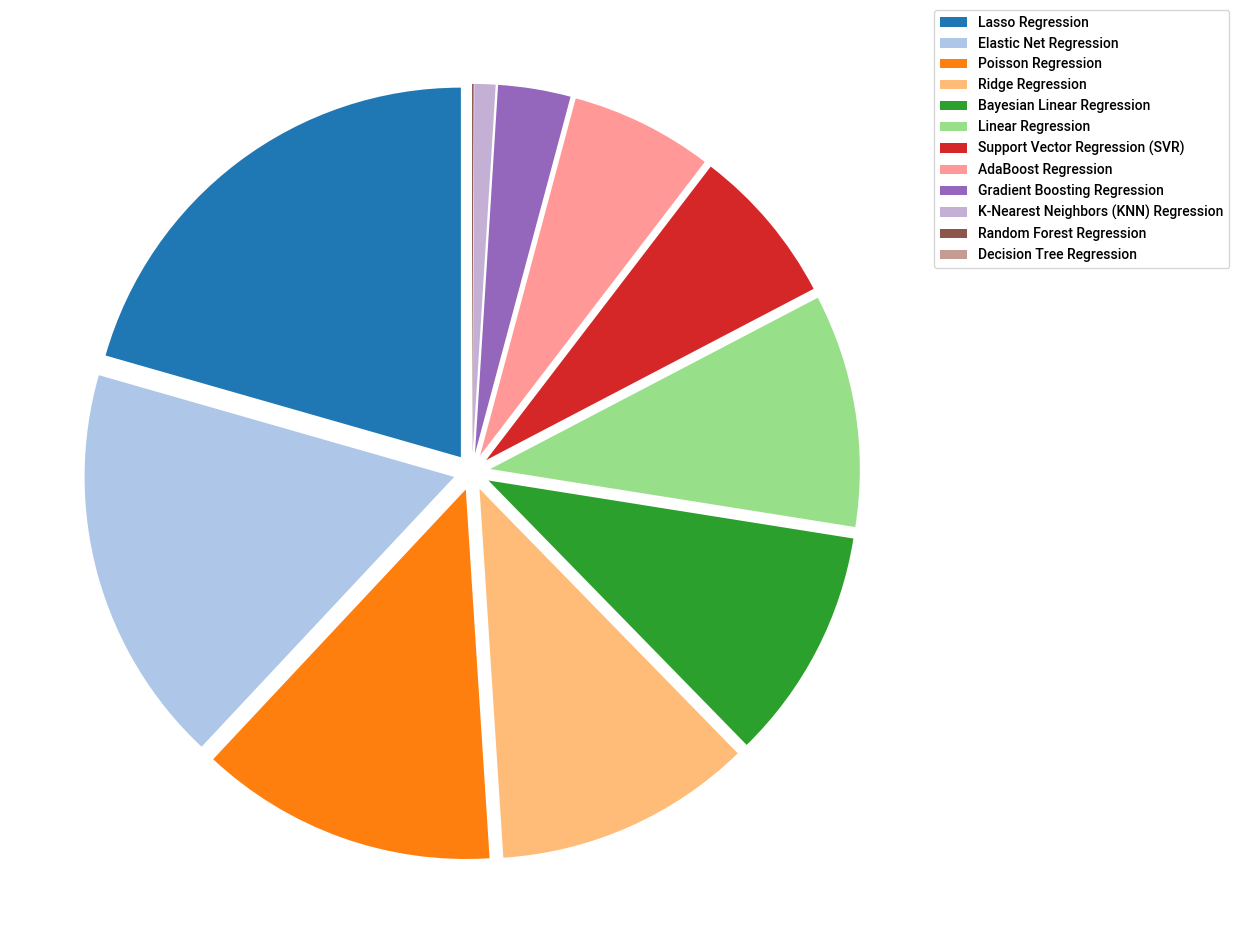

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(models, orient='index')

# Define a list of colors for each model using a different colormap ('tab20')
colors = plt.cm.tab20.colors

# Sort the DataFrame by RMSE values in descending order
df = df.sort_values(by='rmse', ascending=False)

# Define the explode values for each model
explode = [0.05] * len(df)

# Create a pie chart with custom colors and explode
fig, ax = plt.subplots(figsize=(12, 12))
wedge, labels, autopct = ax.pie(
    df['rmse'],
    labels=None, # Suppress labels inside the pie chart
    autopct='', # Suppress percentage labels
    startangle=90,
    colors=colors[:len(df)], # Use only the needed number of colors
    explode=explode, # Explode values
)

# Create a custom legend outside of the pie chart
ax.legend(wedge, df.index, loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

# Set the title and remove the y-axis label
ax


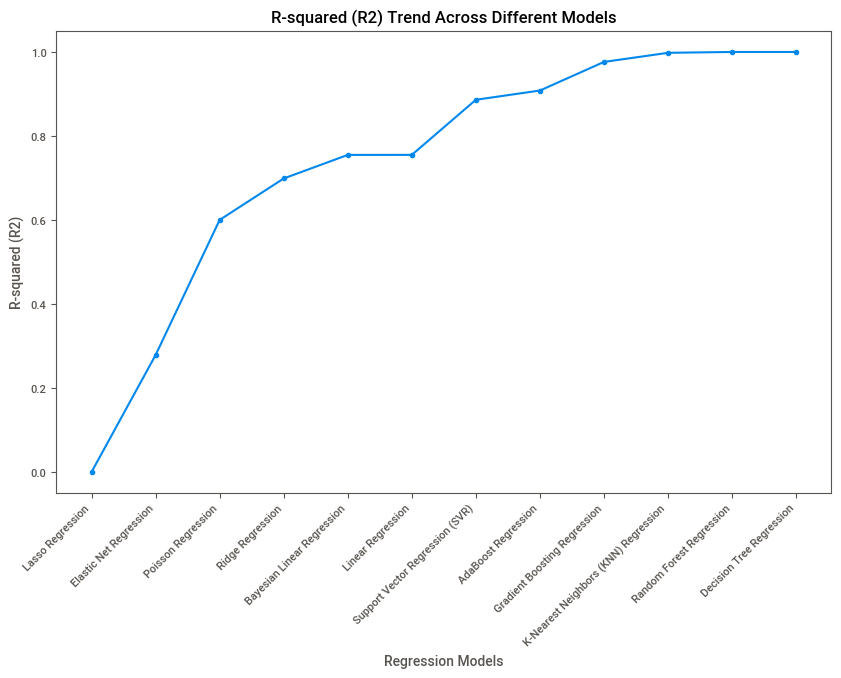

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['r2'], marker='o')
plt.title('R-squared (R2) Trend Across Different Models')
plt.xlabel('Regression Models')
plt.ylabel('R-squared (R2)')
plt.xticks(rotation=45, ha='right')
plt.show()

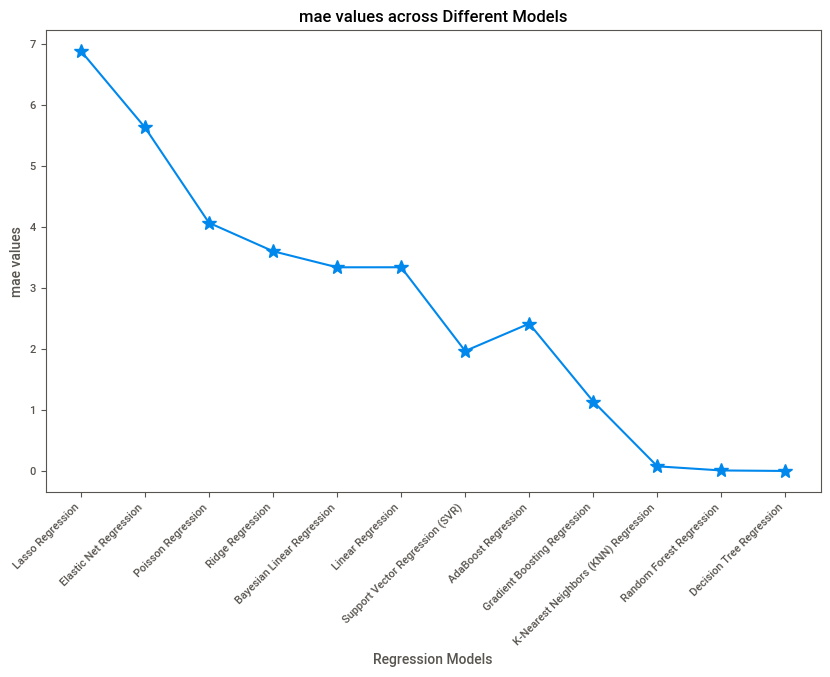

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['mae'], marker='*',markersize=10)
plt.title('mae values across Different Models')
plt.xlabel('Regression Models')
plt.ylabel('mae values')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the above graphs,we can say random forest is performing well. so we will select random forest for our project.

# Predict New Values

In [89]:
df

,mse,r2,mae,rmse
Lasso Regression,8.966977e+01,-0.000314,6.883218e+00,9.469412e+00
Elastic Net Regression,6.468855e+01,0.278365,5.630318e+00,8.042919e+00
Poisson Regression,3.585460e+01,0.600023,4.066813e+00,5.987871e+00
Ridge Regression,2.701032e+01,0.698685,3.601142e+00,5.197146e+00
Bayesian Linear Regression,2.197784e+01,0.754825,3.337691e+00,4.688053e+00
Linear Regression,2.196972e+01,0.754916,3.338225e+00,4.687187e+00
Support Vector Regression (SVR),1.020601e+01,0.886147,1.965971e+00,3.194684e+00
AdaBoost Regression,8.236521e+00,0.908117,2.414566e+00,2.869934e+00
Gradient Boosting Regression,2.128909e+00,0.976251,1.137988e+00,1.459078e+00
K-Nearest Neighbors (KNN) Regression,1.811827e-01,0.997979,7.609265e-02,4.256556e-01


In [91]:
crim_new=float(input("Enter Crime rate in zone :"))
zn_new=float(input("Enter Proportion of residential land in the zone :"))
indus_new=float(input("Enter Proportion of non-retail business acres in zone :"))
chas_new=int(input("Bound by Charles River, Enter (Yes-1/No-0):"))
nox_new=float(input("Enter Nitric oxides concentration (parts per 10 million) :"))
rm_new=float(input("Enter Average number of rooms per dwelling :"))
age_new=float(input("Enter Proportion of owner-occupied units built prior to 1940 :"))
dis_new=float(input("Enter Weighted distances to five Boston employment centers :"))
rad_new=int(input("Enter Index of accessibility to radial highways :"))
tax_new=float(input("Enter Full-value property tax rate per $10,000 in the zone :"))
ptratio_new= float(input("Enter Pupil-teacher ratio in the zone :"))
b_new= float(input("Enter proportion of Black residents in the zone :"))
lstat_new= float(input("Enter Percentage of lower status of the population :"))

prediction=random_forest_regressor.predict(minmax.transform([[crim_new,zn_new,indus_new,chas_new,nox_new,rm_new,age_new,dis_new,rad_new,tax_new,ptratio_new,b_new,lstat_new]]))
print(f"Prediction Value : {prediction}")

Prediction Value : [33.4]


c:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
